In [77]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [78]:
np.random.seed(0)

<b>Load the dataset</b>

In [79]:
iris =load_iris()
df=pd.DataFrame(iris.data,columns = iris.feature_names)

In [80]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
df["species"]= pd.Categorical.from_codes(iris.target,iris.target_names)

In [82]:
df.shape

(150, 5)

Rename the columns

In [83]:
df = df.rename(columns = {"sepal length (cm)": "sepal_length","sepal width (cm)":"sepal_width","petal length (cm)":
              "petal_length","petal width (cm)":"petal_width"})

In [84]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<b> Separate the feature and taget variable</b>

In [85]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]

In [86]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
le = LabelEncoder().fit(y)
y = le.transform(y)

In [89]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<b> Standardise the data</b>

In [90]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
#Split the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(standardized_X,y,test_size =0.30)

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Hand tuned the hyperparameter
rc = RandomForestClassifier(n_estimators =100)

In [103]:
rc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred = rc.predict(X_test)

In [105]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


No handles with labels found to put in legend.


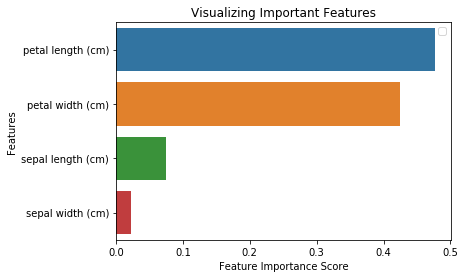

In [106]:
feature_imp = pd.Series(rc.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()